# Random Forest to predict kernel color using carotenoid traits

Credit to these tutorials: 
- https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
- https://www.analyticsvidhya.com/blog/2021/05/multiple-linear-regression-using-python-and-scikit-learn/

# Questions
1. Will a Random Forest Model outperform the best-performing linear model? 
2. How are each of the variables weighted in the RF Model?
    - Does this fit our scientific expectations?
3. How can the model be tweaked/adjusted to improve RF prediction?

## Quick Refresher: what is random forest?

- A supervised learning model (meaning it takes in labled training data, which is used to predict test data after the model is fit)
- Can be used for both classification and regression problems 
    - classification: can the dependent variables predict if the air quality index is above the "healthy" threshold?
    - regression: can the dependent variables predict the value of the air quality index?
- Incorporates the results from many (eg. 1000) decision trees to figure out 
    - the best fit model
    - the importance of each node (which represents a dependent variable)

# Data Processing-- the details
Would you like to see this part, or should I skip to the results? 

In [28]:
from platform import python_version
print(python_version())

3.8.5


In [29]:
#general python
import numpy as np
import pandas as pd

#plotting
import matplotlib.pyplot as plt

#modeling
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

#assessing model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [30]:
data = pd.read_csv('/Users/maryfrancis/Documents/Diepenbrock_Lab/Carotenoid_NAM/transformed.BLUEs.csv')
data["population"] = data["population"].astype("category")
data = data.drop(['GenoCode'], axis=1)

In [31]:
data.head(5)
data = pd.get_dummies(data)

In [32]:
data.iloc[:,5:].head(5)
poplist = [
['population_1', 'population_3', 'population_8'],
['population_10', 'population_12', 'population_13'],
['population_20', 'population_21', 'population_23','population_25']
]

In [33]:
y = data["traitKC"]
x = data[["a_carotene","b_carotene","b_cryp","lutein","phytofluene","zeaxanthin","zeino","total_carot","population_1", "population_3", "population_8","population_10", "population_12", "population_13","population_20", "population_21", "population_23","population_25"]]

In [34]:
labels = np.array(data['traitKC'])
features= data.drop(['traitKC','Unnamed: 0'], axis = 1)
feature_list = list(features.columns)
features = np.array(features)

In [35]:
#print('Training Features Shape:', train_features.shape)
#print('Training Labels Shape:', train_labels.shape)
#print('Testing Features Shape:', test_features.shape)
#print('Testing Labels Shape:', test_labels.shape)

# Before we predict using random forest, we need a baseline!
Question 1 asks if RF will outperform a linear model-- to find out, we must run that linear model to calculate baseline performance.

In [36]:
# splitting the data
indices = list(range(0,30,1))
score = ['' for i in range(30)]
baseline_errors = ['' for i in range(30)]
mape_base = ['' for i in range(30)]
accuracy_base = ['' for i in range(30)]

for index in indices:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,random_state=index)
    LR = LinearRegression()
    # fitting the training data
    LR.fit(x_train,y_train)
    #predict
    y_prediction =  LR.predict(x_test)

    # assessing accuracy
    score[index]=r2_score(y_test,y_prediction)
    
    baseline_errors[index] = abs(y_prediction - y_test)
    mape_base[index] = 100 * (baseline_errors[index] / y_test)
    accuracy_base[index] = 100 - np.mean(mape_base[index])

    

print('r2 socre is: ',round(np.mean(score),3))
print('Average baseline error: ', round(np.mean(baseline_errors), 2), "transformed BLUE units")
print('Base Accuracy:', round(np.mean(accuracy_base), 2), '%.')


r2 socre is:  0.719
Average baseline error:  0.25 transformed BLUE units
Base Accuracy: 92.41 %.


# Into the Woods
Now, we create a Random Forest model with 1000 estimators (decision trees), fit, predict, and assess.

In [37]:
indices = list(range(0,30,1))
score = ['' for i in range(30)]
errors = ['' for i in range(30)]
mape = ['' for i in range(30)]
accuracy = ['' for i in range(30)]

for index in indices:
    train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.3,random_state=index)

    rf = RandomForestRegressor(n_estimators = 1000)
    rf.fit(train_features, train_labels);
    predictions = rf.predict(test_features)

    # Calculate the absolute errors
    errors[index] = abs(predictions - test_labels)
    mape[index] = 100 * (errors[index] / test_labels)
    accuracy[index] = 100 - np.mean(mape[index])
    score[index]=r2_score(test_labels,predictions)

print('r2 socre is: ',round(np.mean(score),3))
print('Mean Absolute Error:', round(np.mean(errors), 2),"transformed BLUE units")
print('Accuracy:', round(np.mean(accuracy), 2), '%.')


r2 socre is:  0.713
Mean Absolute Error: 0.25 transformed BLUE units
Accuracy: 92.39 %.


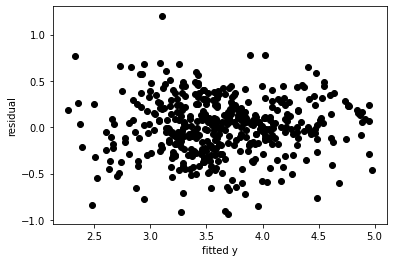

In [38]:
plt.plot(predictions, test_labels - predictions,'o', color='black')
plt.ylabel('residual'); plt.xlabel('fitted y');

# Feature Importance
This section addresses question 2: which variables does the model weight as important, 

In [39]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: zeaxanthin           Importance: 0.58
Variable: total_carot          Importance: 0.12
Variable: b_carotene           Importance: 0.05
Variable: b_cryp               Importance: 0.05
Variable: a_carotene           Importance: 0.04
Variable: lutein               Importance: 0.04
Variable: phytofluene          Importance: 0.04
Variable: zeino                Importance: 0.03
Variable: population_3         Importance: 0.02
Variable: population_25        Importance: 0.02
Variable: population_10        Importance: 0.01
Variable: population_12        Importance: 0.01
Variable: population_1         Importance: 0.0
Variable: population_8         Importance: 0.0
Variable: population_13        Importance: 0.0
Variable: population_20        Importance: 0.0
Variable: population_21        Importance: 0.0
Variable: population_23        Importance: 0.0


In [40]:
plot_list = pd.DataFrame(
    {'features': feature_list,
     'importances': importances,
    })
plot_list = plot_list.sort_values("importances", ascending=False)
plot_list

plot_list["features"]
list_feature = ["ZEA", "TOTCAR", "BCRY", "BCAR", "PHYF", "LUT", "ZEI", "ACAR", "Family_25", "Family_3", "Family_12", "Family_10", "Family_23", "Family_20", "Family_8", "Family_13", "Family_1", "Family_21"]


Dict = dict({"zeaxanthin": "ZEA", "total_carot":"TOTCAR", "b_cryp":"BCRY", "b_carotene":"BCAR", "phytofluene":"PHYF", "lutein":"LUT", "zeino":"ZEI", "a_carotene":"ACAR", "population_25":"Family_25", "population_3":"Family_3", "population_12":"Family_12", "population_10":"Family_10", "population_23":"Family_23", "population_20":"Family_20", "population_8":"Family_8", "population_13":"Family_13", "population_1":"Family_1", "population_21":"Family_21"})

L2 = pd.Series(plot_list["features"]).map(Dict)




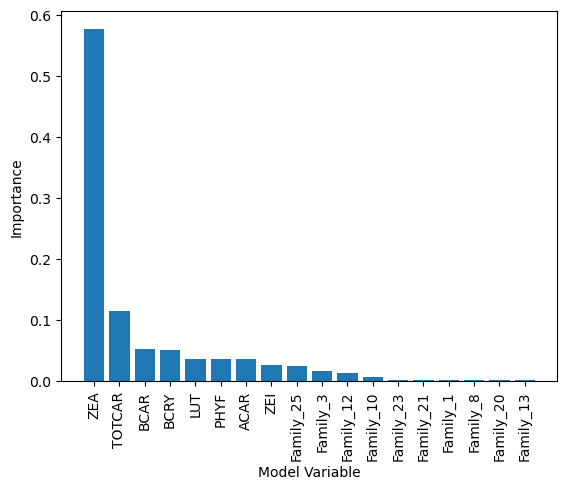

In [41]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
theme_bw = "path2file/theme_bw.mplstyle"
%matplotlib inline
# Set the style
plt.style.use("default")
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, plot_list["importances"], orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, L2, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Model Variable');

# Hyper-parameterization
Since the RF performed slightly worse than the linear model, my hyperparameters could have been better-optimized. I will re-hyperparameterize using the "random search" and "grid search" methods from sci-kit learn.

https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

In [42]:
#check which parameters I was using
from pprint import pprint
print('Parameters currently in use:\n')
pprint(rf.get_params()) #makes the print pretty

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
    
Now the plan is to first do a random search, and then do a grid search  

# Random Search

In [43]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [44]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(train_features, train_labels)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   53.5s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.0min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [45]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': True}

In [60]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    print(r2_score(test_labels,predictions))
    
    return accuracy
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(train_features, train_labels)
base_accuracy = evaluate(base_model, test_features, test_labels)
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, test_features, test_labels)
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 0.2601 degrees.
Accuracy = 92.41%.
0.7267117838470625
Model Performance
Average Error: 0.2508 degrees.
Accuracy = 92.66%.
0.7514476868017701
Improvement of 0.27%.


# Grid Search

In [61]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [110,120,130,140,150],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1,2,3],
    'min_samples_split': [9,10,11],
    'n_estimators': [500,600,700]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [62]:
# Fit the grid search to the data
grid_search.fit(train_features, train_labels)
grid_search.best_params_

Fitting 3 folds for each of 135 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   47.0s
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:   55.0s finished


{'bootstrap': True,
 'max_depth': 110,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 9,
 'n_estimators': 500}

In [64]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, test_features, test_labels)
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))
#print('Mean Squared Error:', mean_squared_error(test_labels, y_pred))  


Model Performance
Average Error: 0.2494 degrees.
Accuracy = 92.68%.
0.753921165818382
Improvement of 0.30%.


Variable: zeaxanthin           Importance: 0.27
Variable: total_carot          Importance: 0.19
Variable: b_cryp               Importance: 0.16
Variable: b_carotene           Importance: 0.08
Variable: lutein               Importance: 0.07
Variable: zeino                Importance: 0.05
Variable: population_25        Importance: 0.04
Variable: a_carotene           Importance: 0.03
Variable: phytofluene          Importance: 0.03
Variable: population_3         Importance: 0.02
Variable: population_20        Importance: 0.02
Variable: population_10        Importance: 0.01
Variable: population_12        Importance: 0.01
Variable: population_1         Importance: 0.0
Variable: population_8         Importance: 0.0
Variable: population_13        Importance: 0.0
Variable: population_21        Importance: 0.0
Variable: population_23        Importance: 0.0


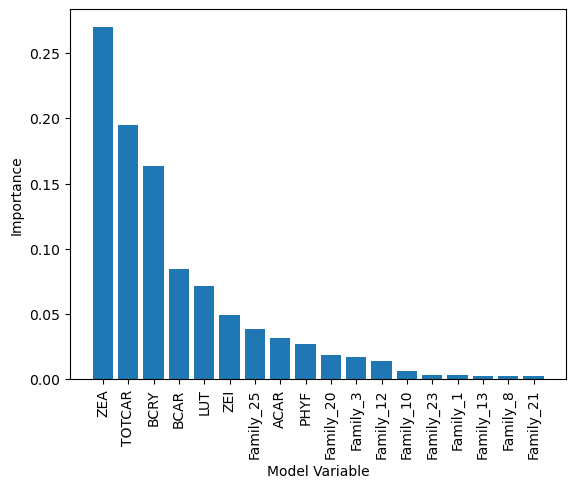

In [65]:
# Get feature importance for the new and improved model!
importances = list(best_grid.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];
plot_list = pd.DataFrame(
    {'features': feature_list,
     'importances': importances,
    })
plot_list = plot_list.sort_values("importances", ascending=False)
plot_list

plot_list["features"]
list_feature = ["ZEA", "TOTCAR", "BCRY", "BCAR", "PHYF", "LUT", "ZEI", "ACAR", "Family_25", "Family_3", "Family_12", "Family_10", "Family_23", "Family_20", "Family_8", "Family_13", "Family_1", "Family_21"]


Dict = dict({"zeaxanthin": "ZEA", "total_carot":"TOTCAR", "b_cryp":"BCRY", "b_carotene":"BCAR", "phytofluene":"PHYF", "lutein":"LUT", "zeino":"ZEI", "a_carotene":"ACAR", "population_25":"Family_25", "population_3":"Family_3", "population_12":"Family_12", "population_10":"Family_10", "population_23":"Family_23", "population_20":"Family_20", "population_8":"Family_8", "population_13":"Family_13", "population_1":"Family_1", "population_21":"Family_21"})

L2 = pd.Series(plot_list["features"]).map(Dict)
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
theme_bw = "path2file/theme_bw.mplstyle"
%matplotlib inline
# Set the style
plt.style.use("default")
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, plot_list["importances"], orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, L2, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Model Variable');



In conclusion, there was not much improvement over the "original" RF model, and there is no improvement over the linear model. This holds with our initial assumptions!

In [ ]:
#calculate R^2 of the update


y_pred = best_grid.

y_true = test_labels


In [57]:
r2_score(y_true,y_pred)

<function sklearn.metrics._regression.r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')>

In [58]:
best_grid

RandomForestRegressor(max_depth=110, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=11, n_estimators=600)